# Case 2:  Diabetic Retinopathy Analysis 
Mika Paavola
Last edited: 17.03.2018
Cognitive Systems for Health Technology Applications
Helsinki Metropolia University of Applied Sciences

# Objective
The aim of this assignment is to learn to use convolutional neural networks to classify medical images and
use convolutional neural networks to create a classifier for diabetic retinopathy images.


# Libraries
Import libraries

In [3]:
import pandas as pd
import keras
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


# Hyperparameters
I made all hyperparameters so it is easy to modify

In [4]:
image_width = 224
image_height = 224

batch_size = 20
num_of_epochs = 80
learning_rate = 0.0001

# Save model
save_model is callback function for training process

In [5]:
save_model = ModelCheckpoint('best_model.h5', 
                             monitor='val_acc', 
                             mode='max', 
                             verbose=1,
                            save_best_only=True)

# Prepare the data
Load images and modify orginal images 

In [6]:

train_images_path = 'dataset2/train/'
validation_images_path = 'dataset2/validation/'


train_image_generator = ImageDataGenerator(
        rescale=1./255,
        #rotation_range=360,
        #zoom_range=0.2,
        #horizontal_flip=True
        #shear_range=0.2
        )

valid_image_generator = ImageDataGenerator(
        rescale=1./255,
        )


train_data = train_image_generator.flow_from_directory(train_images_path, color_mode='rgb',
                                                 target_size=(image_width,image_height),
                                                 class_mode='binary', batch_size=batch_size)

validation_data = valid_image_generator.flow_from_directory(validation_images_path, color_mode='rgb',
                                                      target_size=(image_width,image_height),
                                                      class_mode='binary', batch_size=batch_size)

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


# Import pre-trained model

In [7]:
#Load model
mobile_model = keras.applications.mobilenet.MobileNet()

mobile_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

# New model
Using pre-trained model as base model train only part of layers from base model.

In [8]:
#import Dense from keras
from keras.layers import Dense
from keras.optimizers import Adam

#set learning rate
learning_rate = 0.0001

x = mobile_model.layers[-6].output

predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=mobile_model.inputs, outputs=predictions)

for layer in model.layers[:65]:
    layer.trainable = False

model.summary()
model.compile(Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

# Training the model
here we train the model using callback function and save model if it is better than previous

In [9]:
batch_size = 20
history = model.fit_generator(train_data, 
                              steps_per_epoch = len(train_data)/batch_size,
                              validation_data = validation_data, 
                              validation_steps = len(validation_data)/batch_size,
                              epochs=80, verbose = 2, callbacks=[save_model])

Epoch 1/80
 - 278s - loss: 0.5905 - acc: 0.6530 - val_loss: 0.6573 - val_acc: 0.6085

Epoch 00001: val_acc improved from -inf to 0.60853, saving model to best_model.h5
Epoch 2/80
 - 242s - loss: 0.5416 - acc: 0.7333 - val_loss: 0.6490 - val_acc: 0.5950

Epoch 00002: val_acc did not improve from 0.60853
Epoch 3/80
 - 243s - loss: 0.4837 - acc: 0.7833 - val_loss: 0.6621 - val_acc: 0.5853

Epoch 00003: val_acc did not improve from 0.60853
Epoch 4/80
 - 252s - loss: 0.5412 - acc: 0.7500 - val_loss: 0.6961 - val_acc: 0.5523

Epoch 00004: val_acc did not improve from 0.60853
Epoch 5/80
 - 243s - loss: 0.4685 - acc: 0.7500 - val_loss: 0.6365 - val_acc: 0.6163

Epoch 00005: val_acc improved from 0.60853 to 0.61628, saving model to best_model.h5
Epoch 6/80
 - 235s - loss: 0.6168 - acc: 0.7333 - val_loss: 0.6561 - val_acc: 0.5814

Epoch 00006: val_acc did not improve from 0.61628
Epoch 7/80
 - 233s - loss: 0.4813 - acc: 0.8000 - val_loss: 0.6185 - val_acc: 0.6550

Epoch 00007: val_acc improved f

 - 203s - loss: 0.0873 - acc: 1.0000 - val_loss: 0.5447 - val_acc: 0.7306

Epoch 00058: val_acc did not improve from 0.73256
Epoch 59/80
 - 208s - loss: 0.0963 - acc: 1.0000 - val_loss: 0.5256 - val_acc: 0.7209

Epoch 00059: val_acc did not improve from 0.73256
Epoch 60/80
 - 206s - loss: 0.0833 - acc: 1.0000 - val_loss: 0.5298 - val_acc: 0.7287

Epoch 00060: val_acc did not improve from 0.73256
Epoch 61/80
 - 207s - loss: 0.1047 - acc: 1.0000 - val_loss: 0.5338 - val_acc: 0.7151

Epoch 00061: val_acc did not improve from 0.73256
Epoch 62/80
 - 209s - loss: 0.1481 - acc: 0.9500 - val_loss: 0.5502 - val_acc: 0.7132

Epoch 00062: val_acc did not improve from 0.73256
Epoch 63/80
 - 210s - loss: 0.1291 - acc: 1.0000 - val_loss: 0.5555 - val_acc: 0.6996

Epoch 00063: val_acc did not improve from 0.73256
Epoch 64/80
 - 207s - loss: 0.1233 - acc: 0.9833 - val_loss: 0.5621 - val_acc: 0.7035

Epoch 00064: val_acc did not improve from 0.73256
Epoch 65/80
 - 208s - loss: 0.0898 - acc: 1.0000 - va

# Visualize
Using matplotlib we can visualize trainig process and we can react for overfitting

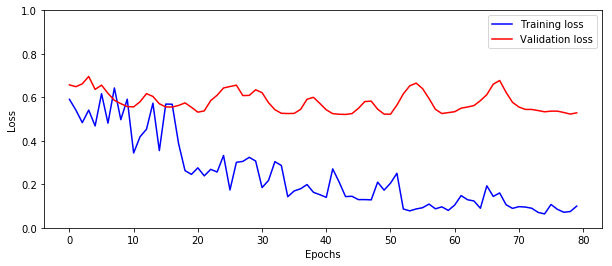

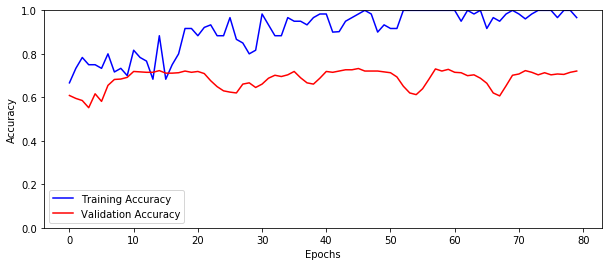

In [10]:
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
train_acc = history.history['acc']

plt.figure(figsize=(10,4))
plt.ylim(0,1)
plt.plot(train_loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.ylim(0,1)
plt.plot(train_acc, 'b', label='Training Accuracy')
plt.plot(val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Conclusion
After making many of different model i get hint from friend that pre-trained model "MobileNet" would give good results and could handel overfitting also quite well. 

I started project by using whole dataset but after many tries i somehow broke my cuda GPU notebook that it wont open anymore and i have to change to the smaller dataset. 

deadline of this project comes quite fast toward and seems that this task wasnt easiest one but at the end it was still quite fun.

I definetly want to fix my GPU system that i can try fulldataset and try to improve model that it could use smaller image size than 224*224.